Import all the necessary libraries and modules.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from copy import copy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics


Read the file adultnames.csv which contains all the income census data,
Dataset Link : https://archive.ics.uci.edu/dataset/20/census+income


In [ ]:
df = pd.read_csv('adultdata.csv')
#Add the column names to the dataframe
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
              'marital_status', 'occupation', 'relationship', 'race', 'sex',
              'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
              'income']
print(df.head())
print(df.describe())

   age          workclass  fnlwgt   education  education-num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital_status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0             0             0              13   United-States   <=50

## Data PreProcosseing Methods

Converting the datatypes

In [ ]:
#Converting every column with object datatype to string and trimming whitespaces
for i in df.columns:
    if (df[i].dtype == object):
        df[i] = df[i].astype("string")
        df[i] = df[i].str.strip()

Removing null values from the dataset. Null values in this dataset is given by '?'.

In [ ]:
#Null values are replaced by np.nan(Not a Number)
df = df.replace('?', np.nan)
print('The number of null values in each column in the data : ')
#Printing the null values in each column
for i in df.columns:
    print("null values in ", i ,' : ', df[i].isnull().sum())


The number of null values in each column in the data : 
null values in  age  :  0
null values in  workclass  :  1836
null values in  fnlwgt  :  0
null values in  education  :  0
null values in  education-num  :  0
null values in  marital_status  :  0
null values in  occupation  :  1843
null values in  relationship  :  0
null values in  race  :  0
null values in  sex  :  0
null values in  capital_gain  :  0
null values in  capital_loss  :  0
null values in  hours_per_week  :  0
null values in  native_country  :  583
null values in  income  :  0


In [ ]:
#Replacing the null values with value with highest frequeny in each column.
df['workclass'] = df['workclass'].fillna(df['workclass'].mode().iloc[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode().iloc[0])
df['native_country'] = df['native_country'].fillna(df['native_country'].mode().iloc[0])

#Printing the number of null values in each column after replacing it.
print('The number of null values in each column in the data  after data preprocssing is : ')
for i in df.columns:
    print("null values in ", i ,' : ', df[i].isnull().sum())

The number of null values in each column in the data  after data preprocssing is : 
null values in  age  :  0
null values in  workclass  :  0
null values in  fnlwgt  :  0
null values in  education  :  0
null values in  education-num  :  0
null values in  marital_status  :  0
null values in  occupation  :  0
null values in  relationship  :  0
null values in  race  :  0
null values in  sex  :  0
null values in  capital_gain  :  0
null values in  capital_loss  :  0
null values in  hours_per_week  :  0
null values in  native_country  :  0
null values in  income  :  0


## Exploratory Data Analysis


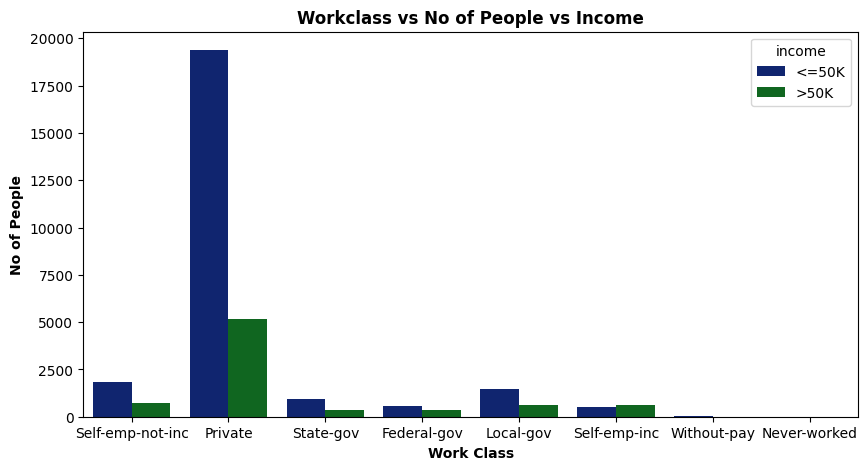

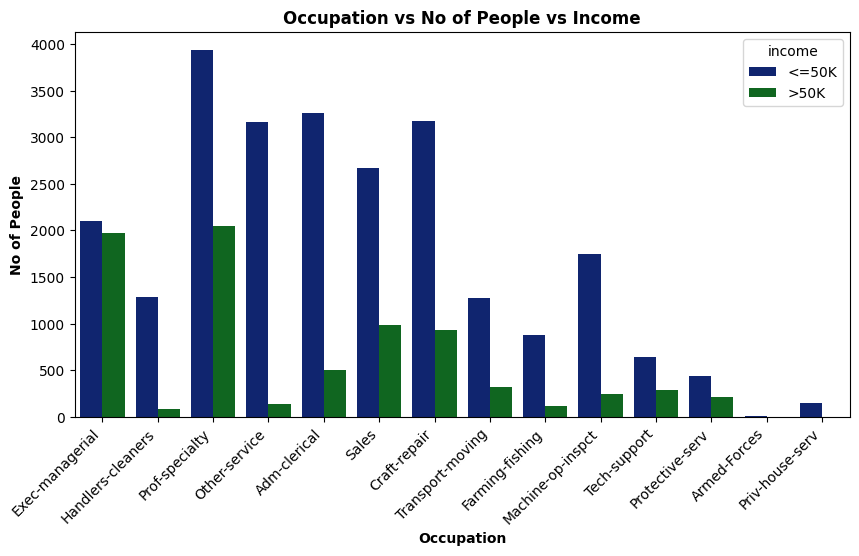

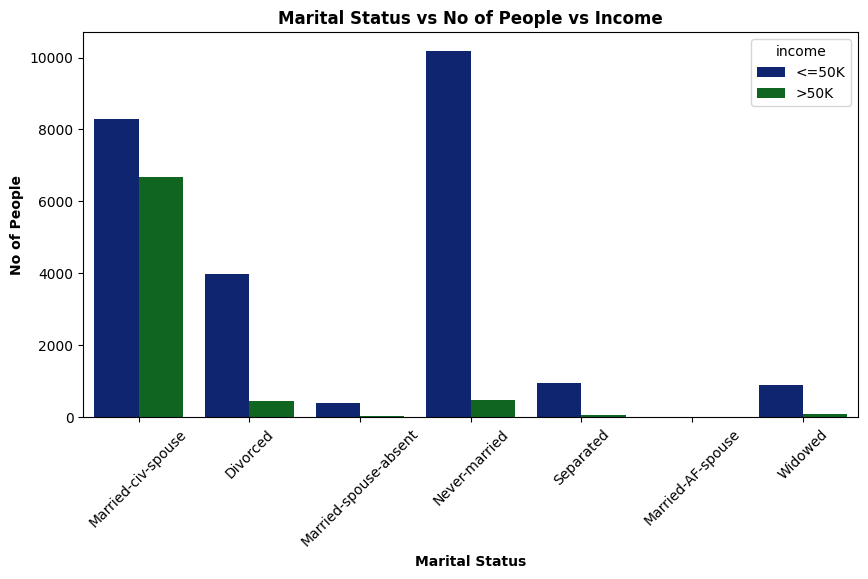

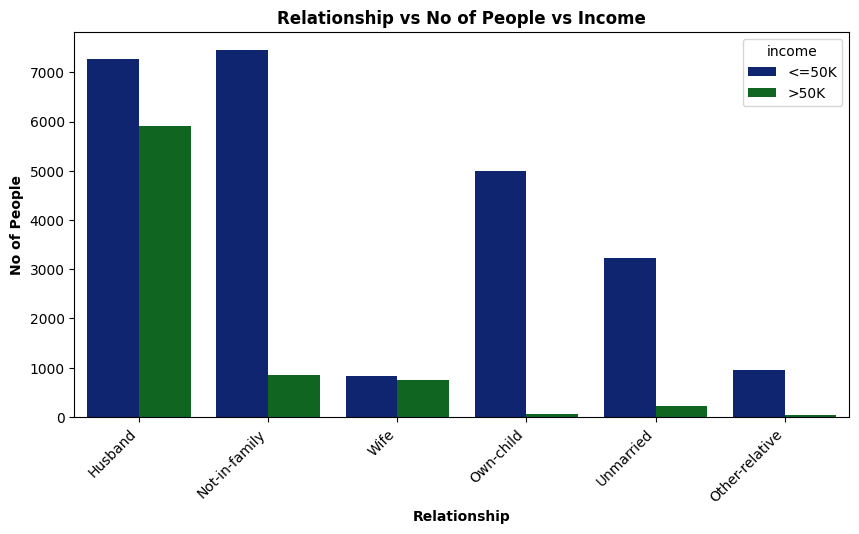

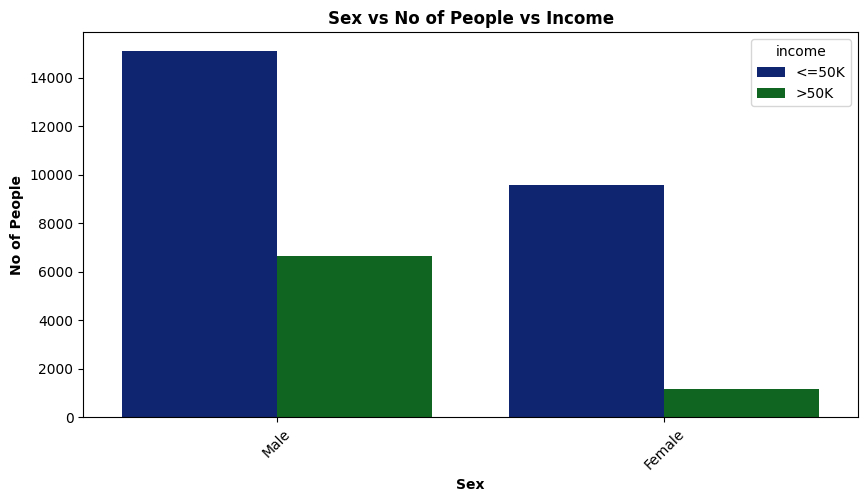

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue ='income',data=df).set_title("Workclass vs No of People vs Income", weight = 'bold')
plt.ylabel('No of People', weight = 'bold')
plt.xlabel('Work Class', weight = 'bold')
plt.show()


fig = plt.figure(figsize=(10,5))
sns.countplot(x='occupation',hue ='income',data=df).set_title("Occupation vs No of People vs Income", weight = 'bold')
plt.ylabel('No of People', weight = 'bold')
plt.xlabel('Occupation', weight = 'bold')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

fig = plt.figure(figsize=(10,5))
sns.countplot(x='marital_status',hue ='income',data=df).set_title("Marital Status vs No of People vs Income", weight = 'bold')
plt.ylabel('No of People', weight = 'bold')
plt.xlabel('Marital Status', weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

fig = plt.figure(figsize=(10,5))
sns.countplot(x='relationship',hue ='income',data=df).set_title("Relationship vs No of People vs Income", weight = 'bold')
plt.ylabel('No of People', weight = 'bold')
plt.xlabel('Relationship', weight = 'bold')
plt.xticks(rotation = 45, ha ='right')
plt.show()


fig = plt.figure(figsize=(10,5))
sns.countplot(x='sex',hue ='income',data=df).set_title("Sex vs No of People vs Income", weight = 'bold')
plt.ylabel('No of People', weight = 'bold')
plt.xlabel('Sex', weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

Creating the target variable column from the income column

In [ ]:
#Creating a new column called income class and assigning them null values.
df['income_class'] = ""

#Based on the income, income_class columnn will be assigned 0 or 1.
def classify(income):
    if income == '<=50K':
        return 0
    elif income == '>50K':
        return 1
df['income_class'] =    df['income'].apply(classify)

## Implementing FEATURE ENGINEERING Techniques :   

## Count/Frequency Encoding

In [ ]:
#Performing Count/Frequency Encoding on native_country column
native_country_freq = df.native_country.value_counts().to_dict()
df['native_country_freq'] = df['native_country']
df.native_country_freq =  df.native_country_freq.map(native_country_freq)

#Performing Count/Frequency Encoding on workclass column
workclass_freq = df.workclass.value_counts().to_dict()
df['workclass_freq'] = df['workclass']
df.workclass_freq =  df.workclass_freq.map(workclass_freq)

#Performing Count/Frequency Encoding on marital_status column
marital_status_freq = df.marital_status.value_counts().to_dict()
df['marital_status_freq'] = df['marital_status']
df.marital_status_freq =  df.marital_status_freq.map(marital_status_freq)

#Performing Count/Frequency Encoding on occupation column
occupation_freq = df.occupation.value_counts().to_dict()
df['occupation_freq'] = df['occupation']
df.occupation_freq =  df.occupation_freq.map(occupation_freq)

#Performing Count/Frequency Encoding on relationship column
relationship_freq = df.relationship.value_counts().to_dict()
df['relationship_freq'] = df['relationship']
df.relationship_freq =  df.relationship_freq.map(relationship_freq)

#Performing Count/Frequency Encoding on race column
race_freq = df.race.value_counts().to_dict()
df['race_freq'] = df['race']
df.race_freq =  df.race_freq.map(race_freq)

## Label Encoding

In [ ]:
#Performing Label Encoding on Education column
education_map = {'Preschool' : 1, '1st-4th' : 2, '5th-6th' : 3,
                 '7th-8th' : 4, '9th' : 5, '10th' :  6, '11th' : 7,
                 '12th' : 8, 'HS-grad' : 9, 'Some-college' : 10,
                 'Assoc-acdm' : 11, 'Assoc-voc' : 12, 'Bachelors' : 13,
                 'Masters' : 14, 'Doctorate' : 15, 'Prof-school' : 16}

df['education_rank'] = df.education.map(education_map)

## One Hot Encoding

In [ ]:
#Performing One Hot Encoding on sex column
df = pd.get_dummies(df, columns = ['sex'], drop_first = True)
#Verifying if all the new columns after feature engineering were added to df.
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'income_class', 'native_country_freq', 'workclass_freq',
       'marital_status_freq', 'occupation_freq', 'relationship_freq',
       'race_freq', 'education_rank', 'sex_Male'],
      dtype='object')


Creating a new dataframe that contains only the feature engineered columns called df_feature_engineered

In [ ]:
df_feature_engineered = pd.DataFrame()
df_feature_engineered = df.drop(['workclass', 'education', 'education-num', 'marital_status',
                                'occupation', 'relationship', 'race',
                                'native_country', 'income'], axis = 1)

## Implementing FEATURE SCALING
StandardScaler method was selected to implement feature scaling as the accuracy results of no scaling and MinMaXScaler(Normalization) methods were less compared to the accuracy results of the 3 algorithms when performed after implementing StandardScaling(Standardization) Method.

In [ ]:
#MinMax Scaler

'''scalingMinMax = MinMaxScaler()
scalingMinMax.fit_transform(df_feature_engineered[['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week',
       'native_country_freq', 'workclass_freq',
       'marital_status_freq', 'occupation_freq', 'relationship_freq','race_freq', 'education_rank', 'sex_Male']])'''

#Standard Scaler
scalingStandard = StandardScaler()
scalingStandard.fit_transform(df_feature_engineered[['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week',
       'native_country_freq', 'workclass_freq',
       'marital_status_freq', 'occupation_freq', 'relationship_freq','race_freq', 'education_rank', 'sex_Male']])

array([[ 0.83709708, -1.0087417 , -0.14591373, ...,  0.41254847,
         1.1221835 ,  0.70308748],
       [-0.04264043,  0.24504633, -0.14591373, ...,  0.41254847,
        -0.42313548,  0.70308748],
       [ 1.05703146,  0.42576955, -0.14591373, ..., -2.32908374,
        -1.19579497,  0.70308748],
       ...,
       [ 1.42358875, -0.3588108 , -0.14591373, ...,  0.41254847,
        -0.42313548, -1.42229812],
       [-1.21562378,  0.11092744, -0.14591373, ...,  0.41254847,
        -0.42313548,  0.70308748],
       [ 0.98372   ,  0.92986178,  1.88840054, ...,  0.41254847,
        -0.42313548, -1.42229812]])

## Implementing FEATURE SELECTION Methods.
Techniques used are :    
1.Correlation Coefficient Method,
2.Recursive Feature Elimination(RFE) Method,
3.Chi Square Method

## Correlation Method

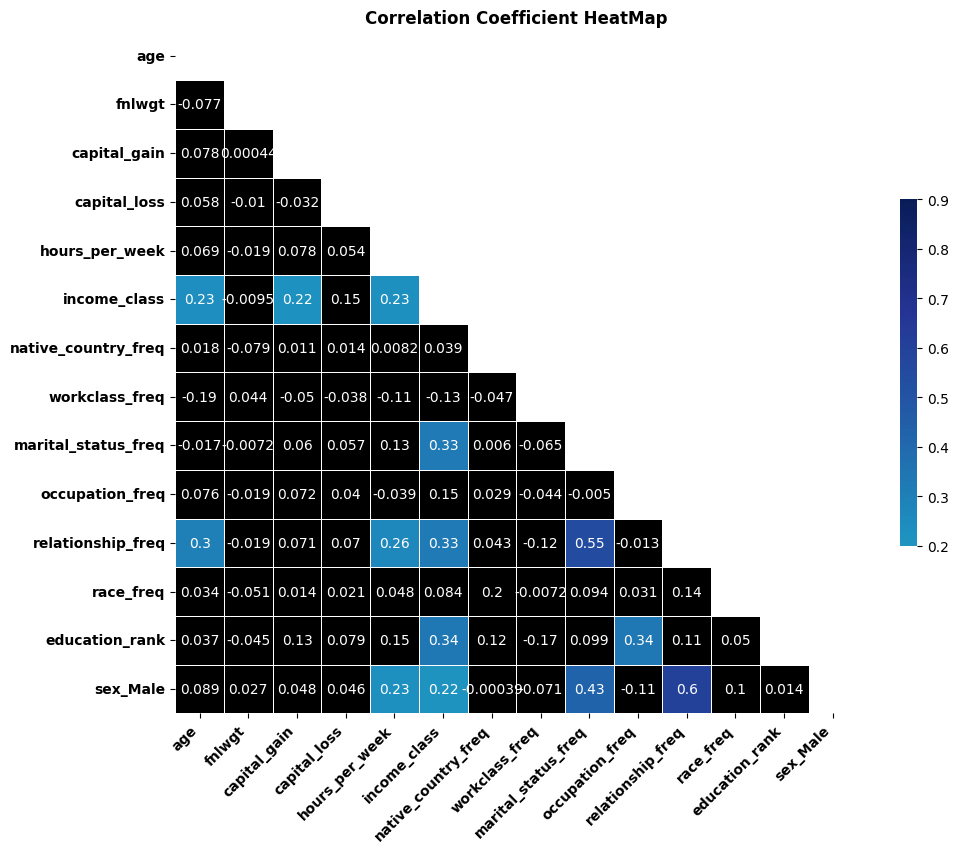

In [ ]:
#Performaing Correlation Method
f, ax = plt.subplots(figsize=(11, 9))
my_cmap = copy(plt.cm.YlGnBu)
my_cmap.set_over("white")
mask = np.zeros(df_feature_engineered.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
my_cmap.set_under("black")
plt.style.use('seaborn-v0_8-dark-palette')
plt.title('Correlation Coefficient HeatMap', weight = 'bold')
sns.heatmap(df_feature_engineered.corr(),mask = mask,  cmap = my_cmap, annot = True,
            vmax = 0.9, vmin = 0.2, center = 0, square = True,
            linewidths = 0.5, cbar_kws={"shrink": .5})
plt.xticks(rotation= 45, ha = 'right', weight = 'bold')
plt.yticks(weight = 'bold')
plt.show()

From the correlation method, the top 7 features were : age, capital_gain,  hours_per_week, sex_Male,
       marital_status_freq,  relationship_freq, education_rank

## Recursive Feature Elimination Method

In [ ]:
y = df_feature_engineered['income_class']
X =  df_feature_engineered[['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week',
       'native_country_freq', 'workclass_freq',
       'marital_status_freq', 'occupation_freq', 'relationship_freq','race_freq', 'education_rank', 'sex_Male']]
rfe  = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = 7)
rfe.fit(X,y)
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} selected = {rfe.support_[i]} rank = {rfe.ranking_[i]}")


age selected = True rank = 1
fnlwgt selected = True rank = 1
capital_gain selected = True rank = 1
capital_loss selected = False rank = 2
hours_per_week selected = True rank = 1
native_country_freq selected = False rank = 4
workclass_freq selected = False rank = 3
marital_status_freq selected = True rank = 1
occupation_freq selected = True rank = 1
relationship_freq selected = False rank = 5
race_freq selected = False rank = 6
education_rank selected = True rank = 1
sex_Male selected = False rank = 7


## Chi Square Method

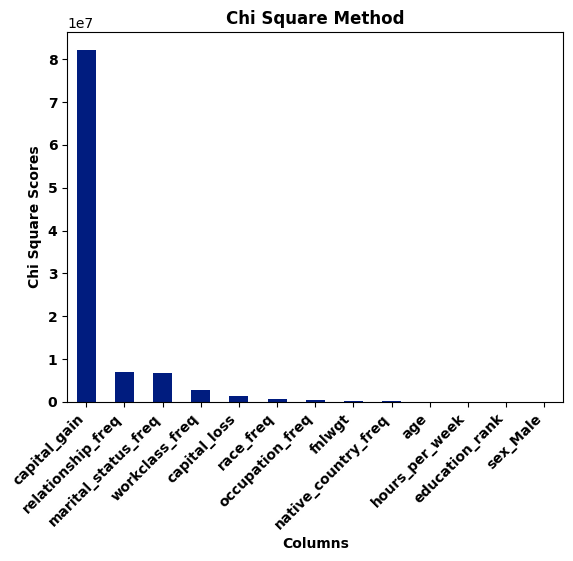

In [ ]:
chi_scores = chi2(X,y)
chi_values = pd.Series(chi_scores[0], index = X.columns)
chi_values.sort_values(ascending = False, inplace = True)
plt.style.use('seaborn-v0_8-dark-palette')
chi_values.plot.bar( )
plt.xticks(rotation = 45,  ha ='right', weight = 'bold')
plt.yticks(weight = 'bold')
plt.title('Chi Square Method', weight = 'bold')
plt.xlabel('Columns', weight = 'bold')
plt.ylabel('Chi Square Scores', weight = 'bold')
plt.show()
#These are the top columns to be considered as features.

# Creating the feature dataset(X) and the target dataset(y).
Since the chi square method of feature selection works best for categorical
features and categorical target columns, the features were selected based on the
selection from chi square method, this was also verified by selecting the columns
as features from correlation method and RFE method. Columns from chi square gave higher accuracy in all the three algorithms compared to the other 2 feature selection methods.

In [ ]:
X = X[['capital_loss', 'capital_gain',  'race_freq', 'workclass_freq',
       'marital_status_freq',  'relationship_freq', 'occupation_freq']]
y = y = df_feature_engineered['income_class']

Splitting the data into train and test.

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

## Implementing the MACHINE LEARNING ALGORITHMS

## Support Vector Machine (SVM)

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      6193
           1       0.75      0.27      0.40      1947

    accuracy                           0.80      8140
   macro avg       0.78      0.62      0.64      8140
weighted avg       0.80      0.80      0.77      8140



<Figure size 1000x700 with 0 Axes>

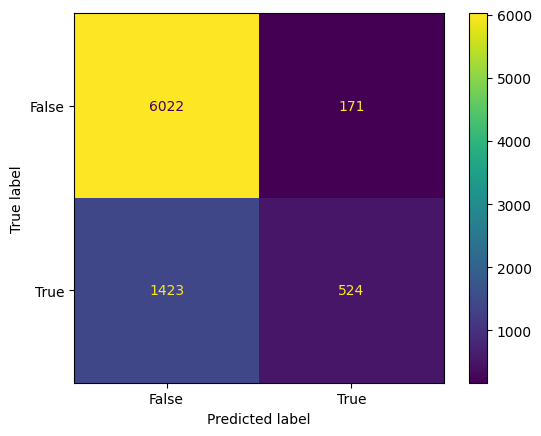

In [ ]:
svmclassifier = SVC(kernel = 'linear')
svmclassifier.fit(X_train, Y_train)
Y_pred_svm = svmclassifier.predict(X_test)
accuracy_score_svm = metrics.accuracy_score(Y_test, Y_pred_svm)
precision_score_svm = metrics.precision_score(Y_test, Y_pred_svm)
f1_score_svm =  metrics.f1_score(Y_test, Y_pred_svm)
recall_score_svm = metrics.recall_score(Y_test, Y_pred_svm)
roc_auc_svm = metrics.roc_auc_score(Y_test, Y_pred_svm)
log_loss_svm = metrics.log_loss(Y_test,Y_pred_svm)
#Printing the classification report.
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report : \n", classification_report(Y_test, Y_pred_svm))
#Printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred_svm)
plt.figure(figsize = (10,7))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()


## Decision Tree CLassifier

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      6193
           1       0.74      0.54      0.63      1947

    accuracy                           0.85      8140
   macro avg       0.81      0.74      0.77      8140
weighted avg       0.84      0.85      0.84      8140



<Figure size 1000x700 with 0 Axes>

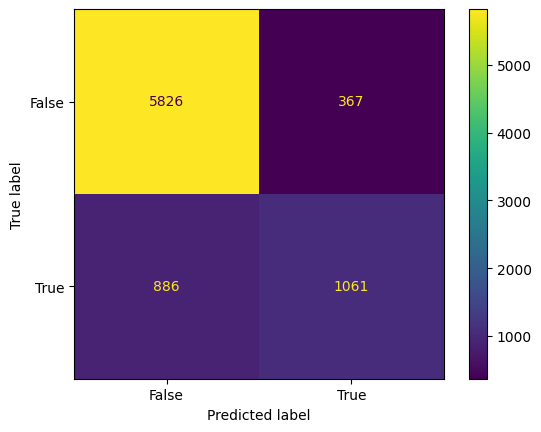

In [ ]:
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(X_train,Y_train)
Y_pred_dt = dtclassifier.predict(X_test)
accuracy_score_dt = metrics.accuracy_score(Y_test, Y_pred_dt)
precision_score_dt = metrics.precision_score(Y_test, Y_pred_dt)
f1_score_dt =  metrics.f1_score(Y_test, Y_pred_dt)
recall_score_dt = metrics.recall_score(Y_test, Y_pred_dt)
roc_auc_dt = metrics.roc_auc_score(Y_test, Y_pred_dt)
log_loss_dt = metrics.log_loss(Y_test,Y_pred_dt)
#Printing the classification Report
print("Classification Report : \n", classification_report(Y_test, Y_pred_dt))
#Printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred_dt)
plt.figure(figsize = (10,7))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Random Forest Classifier

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      6193
           1       0.74      0.54      0.63      1947

    accuracy                           0.85      8140
   macro avg       0.81      0.74      0.77      8140
weighted avg       0.84      0.85      0.84      8140



<Figure size 1000x700 with 0 Axes>

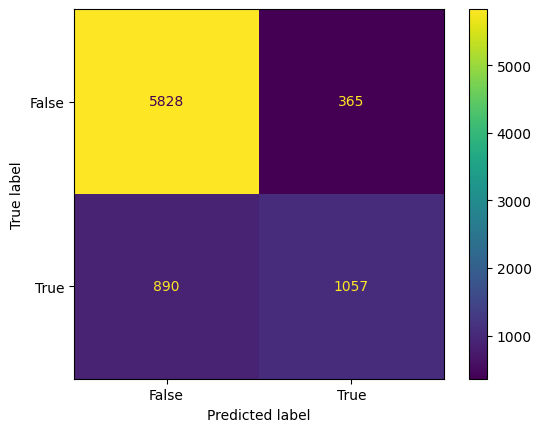

In [ ]:
rfclassifier = RandomForestClassifier()
rfclassifier.fit(X_train, Y_train)
Y_pred_rf = rfclassifier.predict(X_test)
accuracy_score_rf = metrics.accuracy_score(Y_test, Y_pred_rf)
precision_score_rf = metrics.precision_score(Y_test, Y_pred_rf)
f1_score_rf =  metrics.f1_score(Y_test, Y_pred_rf)
recall_score_rf = metrics.recall_score(Y_test, Y_pred_rf)
roc_auc_rf = metrics.roc_auc_score(Y_test, Y_pred_rf)
log_loss_rf = metrics.log_loss(Y_test,Y_pred_rf)
#Printing the classification report
print("Classification Report : \n", classification_report(Y_test, Y_pred_rf))
#Printing the confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize = (10,7))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Performance Comparison Table

In [ ]:
column_names =  ['Algorithm', 'Accuracy Score', 'Precision Score',
            'F1 Score', 'Recall Score', 'ROC AUC Score', 'Log Loss']
performance_table = pd.DataFrame(columns = column_names)

algorithm_list = ['Support Vector MAchine', 'Decision Tree Classifier', 'Random Forest']
accuracy_score_list = [accuracy_score_svm, accuracy_score_dt,accuracy_score_dt]
precision_score_list = [precision_score_svm, precision_score_dt, precision_score_rf]
F1_score_list = [f1_score_svm, f1_score_dt, f1_score_rf]
recall_score_list = [recall_score_svm, recall_score_dt, recall_score_rf]
roc_auc_score_list = [roc_auc_svm, roc_auc_dt, roc_auc_rf]
log_loss_score_list = [log_loss_svm, log_loss_dt, log_loss_rf]
performance_table['Algorithm'] = algorithm_list
performance_table['Accuracy Score'] = accuracy_score_list
performance_table['Precision Score'] = precision_score_list
performance_table['F1 Score'] = F1_score_list
performance_table['Recall Score'] = recall_score_list
performance_table['ROC AUC Score'] = roc_auc_score_list
performance_table['Log Loss'] = log_loss_score_list

print(performance_table)

                  Algorithm  Accuracy Score  Precision Score  F1 Score  \
0    Support Vector MAchine        0.804177         0.753957  0.396669   
1  Decision Tree Classifier        0.846069         0.742997  0.628741   
2             Random Forest        0.846069         0.743319  0.627486   

   Recall Score  ROC AUC Score  Log Loss  
0      0.269132       0.620760  7.058180  
1      0.544941       0.742840  5.548243  
2      0.542886       0.741974  5.557099  


## Roc Curve

Random (Chance) Prediction : AUROC = 0.500
Decision Tree : AUROC = 0.873
Random Forest : AUROC = 0.886


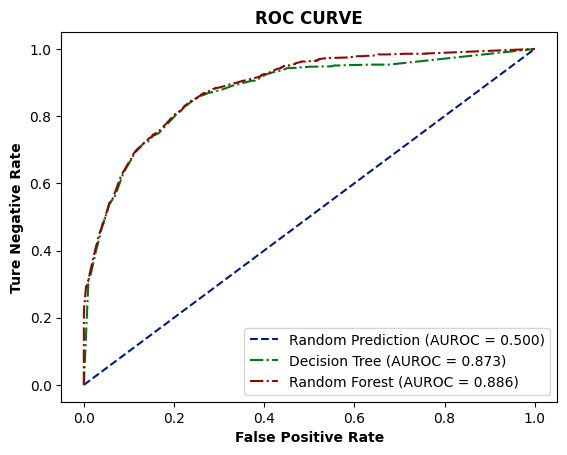

In [ ]:
r_probs = [0 for _ in range(len(Y_test))]
dt_probs = dtclassifier.predict_proba(X_test)
rf_probs = rfclassifier.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
dt_probs = dt_probs[:, 1]
r_auc = metrics.roc_auc_score(Y_test, r_probs)
rf_auc = metrics.roc_auc_score(Y_test, rf_probs)
dt_auc = metrics.roc_auc_score(Y_test, dt_probs)
print("Random (Chance) Prediction : AUROC = %.3f" % (r_auc))
print("Decision Tree : AUROC = %.3f" % (dt_auc))
print( "Random Forest : AUROC = %.3f" % (rf_auc))
r_fpr, r_tpr, _ = metrics.roc_curve(Y_test, r_probs)
dt_fpr, dt_tpr, _ = metrics.roc_curve(Y_test, dt_probs)
rf_fpr, rf_tpr, _ = metrics.roc_curve(Y_test, rf_probs)

plt.plot(r_fpr, r_tpr, linestyle = '--', label = 'Random Prediction (AUROC = %.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, linestyle = '-.', label = 'Decision Tree (AUROC = %.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, linestyle = '-.', label = 'Random Forest (AUROC = %.3f)' % rf_auc)
plt.title('ROC CURVE', weight = 'bold')
plt.xlabel('False Positive Rate', weight = 'bold')
plt.ylabel('Ture Negative Rate', weight = 'bold')
plt.legend(loc = 'lower right')
plt.show()
